<a href="https://colab.research.google.com/github/Heshani99/Detecting-Phishing-Websites/blob/main/Detecting_Phishing_Websites_%5B_Mini_Project_Group_11%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IN4400 - Data Mining & Data Warehousing - Group Assignment**
# **Detecting Phishing Websites**


**Group Members**
* 194115X - Palayangoda TD
* 194052B - Gunathilaka DADP
* 194039R - Dushani RPU
* 194180N - Welihinda VC
* 194181T - Wickramarachchi HR



This file contains codes to build robust binary classification model for distinguishing phishing websites from legitimate ones. The project involves a detailed analysis of several machine learning algorithms in order to assets best feature performance, optimize predictive accuracy and increase performance prediction. The following are the key stages of the project,
* Data preprocessing
* Feature engineering
* Model building and evaluation


### **Dataset**

The dataset used for this project is publicly available on Kaggle, consisting of 11,430 URLs with 87 features. These features are taken from external services, webpage content, and URL structure. The collection is notably balanced, with an equal number of legitimate and phishing URLs.


Web page Phishing Detection Dataset (Kaggle):

https://www.kaggle.com/datasets/shashwatwork/web-page-phishing-detection-dataset

**Import Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_predict, RepeatedStratifiedKFold, cross_val_score
import time

**Load the dataset**

In [ ]:
# Read the CSV dataset into a Pandas DataFrame
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Data Mining Group Assignment - Mini Project/Datasets/dataset_phishing.csv"
df = pd.read_csv(path)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

* It appears that all columns have 11430 non-null entries, which means there are no missing values in the dataset. The data types are either object (which can hold any type of Python objects), int64 (which is used for integer values) or float64 (which is used for float values).

In [ ]:
#Check Number of rows/data points and Number of feartures
df.shape

(11430, 89)

This dataset contains 11430 URLs with 87 extracted features with URL column and then the class varaible. The features were collected from 3 different types:
* URL based features : 56 extracted from structure and syntax of URL
* Page based features : 24 extracted from content of their corresponding pages
* External services based features : 7 extracted by querying external services

In [ ]:
# display statistical measures of all numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
length_url,11430.0,61.126684,5.529732e+01,12.0,33.00,47.0,71.00,1641.0
length_hostname,11430.0,21.090289,1.077717e+01,4.0,15.00,19.0,24.00,214.0
ip,11430.0,0.150569,3.576436e-01,0.0,0.00,0.0,0.00,1.0
nb_dots,11430.0,2.480752,1.369686e+00,1.0,2.00,2.0,3.00,24.0
nb_hyphens,11430.0,0.997550,2.087087e+00,0.0,0.00,0.0,1.00,43.0
...,...,...,...,...,...,...,...,...
domain_age,11430.0,4062.543745,3.107785e+03,-12.0,972.25,3993.0,7026.75,12874.0
web_traffic,11430.0,856756.643307,1.995606e+06,0.0,0.00,1651.0,373845.50,10767986.0
dns_record,11430.0,0.020122,1.404254e-01,0.0,0.00,0.0,0.00,1.0
google_index,11430.0,0.533946,4.988682e-01,0.0,0.00,1.0,1.00,1.0


<Axes: xlabel='status', ylabel='count'>

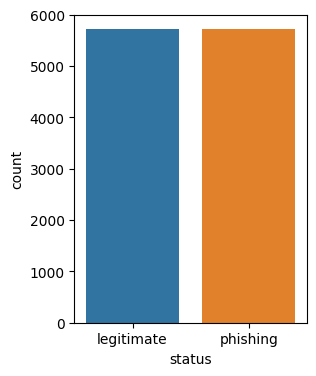

In [ ]:
# checking distribution of samples per class. It can be observed that the binary classes are nearly balanced.
#df['Class'].value_counts()
plt.figure(figsize=(3,4))
sns.countplot(data=df, x='status')

* The dataset is balanced (classes are balanced), it contains exactly 50% phishing and 50% legitimate URLs.

In [ ]:
df.drop('url', axis = 1, inplace = True)

In [ ]:
df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


# **Data Preprocessing**

## Data Cleaning and EDA


### **Handling missing values**
* Identifying missing values represented with other values other than NaN and converting them to the latter

Initial examination of the dataset to separate columns into numerical and categorical ones.

In [ ]:
# Get the list of all columns
cols = df.columns.to_list()

# Identify numerical columns
numerical_cols = df.select_dtypes(include='number').columns.to_list()

# Identify non-numerical (categorical) columns
categorical_cols = df.select_dtypes(exclude='number').columns.to_list()


Examining numerical features in the dataset to identify and print values that are less than 0.

In [ ]:
# Identify values below 0 in each numerical feature
for col in numerical_cols:
    # Get unique values in the column
    list_unique_value_col = df[col].unique()

    # Extract values less than 0
    sublist_unique_value_col = [x for x in list_unique_value_col if x < 0]

    # If values less than 0 exist, print the column name and sorted values
    if sublist_unique_value_col:
        print(col, '-', sorted(sublist_unique_value_col, reverse=True))

domain_registration_length - [-1]
domain_age - [-1, -2, -12]


Negative values in the two features above are meaningless, thus treated as errors/missing values. We therefore replace them with NaN.

In [ ]:
df.replace([-1.-1,-2,-12], np.nan, inplace=True)

In [ ]:
nan_check = df.isna()

if nan_check.any().any():
    nan_percentage = (nan_check.sum().sum() / df.size) * 100
    print(f"There are NaN values in the DataFrame. NaN Percentage: {nan_percentage:.2f}%")
    print("Locations of NaN values:")
    print(df[df.isna()])
else:
    print("There are no NaN values in the DataFrame.")

There are NaN values in the DataFrame. NaN Percentage: 0.01%
Locations of NaN values:
       length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  \
0             NaN              NaN NaN      NaN         NaN    NaN    NaN   
1             NaN              NaN NaN      NaN         NaN    NaN    NaN   
2             NaN              NaN NaN      NaN         NaN    NaN    NaN   
3             NaN              NaN NaN      NaN         NaN    NaN    NaN   
4             NaN              NaN NaN      NaN         NaN    NaN    NaN   
...           ...              ...  ..      ...         ...    ...    ...   
11425         NaN              NaN NaN      NaN         NaN    NaN    NaN   
11426         NaN              NaN NaN      NaN         NaN    NaN    NaN   
11427         NaN              NaN NaN      NaN         NaN    NaN    NaN   
11428         NaN              NaN NaN      NaN         NaN    NaN    NaN   
11429         NaN              NaN NaN      NaN         NaN    NaN 

Calculate the percentage of missing values for each feature in the dataset.

In [ ]:
# Calculate the missing value percentage for each column
missing_percentage = (df.isnull().sum().sum() / len(df)) * 100

df.isnull().sum()
print(f"Missing Percentage: {missing_percentage:.2f}%")

# Print the column names that contain missing values
for column in df.columns:
  if(df[column].isnull().any()):
    print(column)


Missing Percentage: 0.49%
domain_age


Plot the percentages of missing values for selected features using horizontal bar chart.

Overall NaN Percentage: 0.00557%


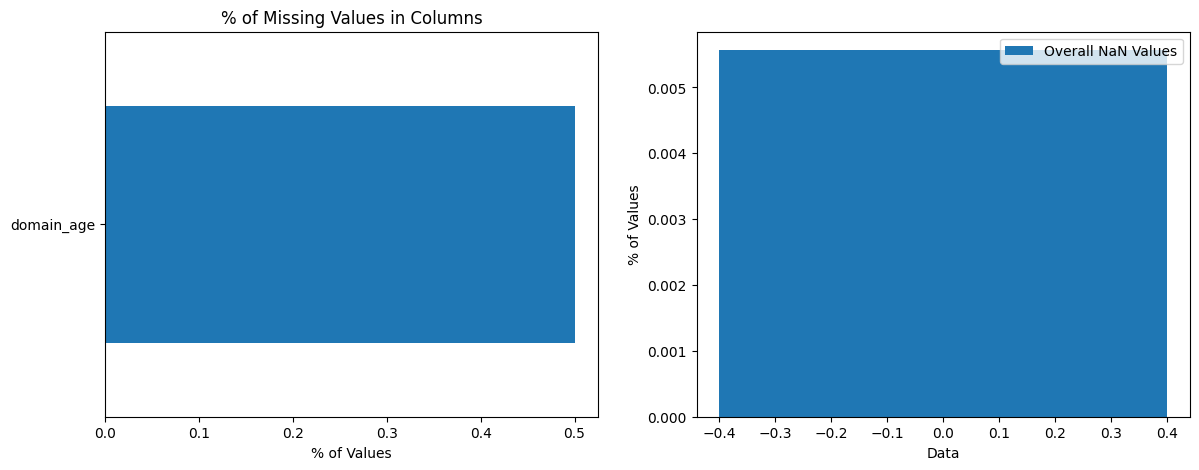

In [ ]:
# Calculate the percentages of missing values for features
df_null_cols = round((df.isnull().sum() / df.shape[0] * 100), 1)

# Calculate the overall percentage of missing values in the entire dataset
overall_nan_percentage = (df.isna().sum().sum() / df.size) * 100

print(f"Overall NaN Percentage: {overall_nan_percentage:.5f}%")

# Select features with at least one missing value
missing_cols = df_null_cols[df_null_cols > 0.0]

# Plot the percentages of missing values for selected features
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
missing_cols.plot.barh(ax=ax[0], title='% of Missing Values in Columns', width=0.8)
ax[0].set_xlabel('% of Values')

# Plot the overall percentage of missing values in the entire dataset
ax[1].bar(0, overall_nan_percentage, label='Overall NaN Values')
ax[1].set_xlabel('Data')
ax[1].set_ylabel('% of Values')
ax[1].legend()

plt.show()


Remove the rows with NaN or null values from the DataFrame

This step is a common data preprocessing technique to ensure the quality of the data and prepare it for further analysis. Rows with missing values are often removed if they cannot be imputed or if they significantly affect the analysis or modeling process.

In [ ]:
# Remove rows with NaN or null values
df = df.dropna()

print("\nDataFrame after removing rows with NaN or null values:")
print(df)


DataFrame after removing rows with NaN or null values:
       length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  \
0              37               19   0        3           0      0      0   
1              77               23   1        1           0      0      0   
2             126               50   1        4           1      0      1   
3              18               11   0        2           0      0      0   
4              55               15   0        2           2      0      0   
...           ...              ...  ..      ...         ...    ...    ...   
11425          45               17   0        2           0      0      0   
11426          84               18   0        5           0      1      1   
11427         105               16   1        2           6      0      1   
11428          38               30   0        2           0      0      0   
11429         477               14   1       24           0      1      1   

       nb_and  nb_o

### Handling Duplicate Records

In [ ]:
# Get the original number of rows
original_rows = df.shape[0]

# Remove duplicated records, keeping the first occurrence
df.drop_duplicates(keep='first', inplace=True)

# Get the number of rows after removing duplicates
new_rows = df.shape[0]

# Calculate and print the number of deleted duplicated rows
deleted_rows = original_rows - new_rows
print('Number of deleted duplicated rows:', deleted_rows)

Number of deleted duplicated rows: 173


<ipython-input-16-8bfc503c1ac4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


### Removing Other Unnecessary Columns

Identify and remove irrelevant columns from the DataFrame.

In [ ]:
# Get the list of columns
cols = df.columns.to_list()

# Identify and remove irrelevant columns with zero variance (only one unique value)
print('Irrelevant column(s) dropped:')
for col in cols:
    counts_unique_values = round(df[col].value_counts(sort=True, normalize=True), 3)

    # Check if the fraction of the most common value is 1, which means only one unique value exists in the column
    if counts_unique_values.iloc[0] == 1.0:
        print(col)
        df.drop([col], axis=1, inplace=True)

# The irrelevant columns have been removed from the DataFrame

Irrelevant column(s) dropped:
nb_or


<ipython-input-17-deeafc5a5d58>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([col], axis=1, inplace=True)
<ipython-input-17-deeafc5a5d58>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([col], axis=1, inplace=True)
<ipython-input-17-deeafc5a5d58>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([col], axis=1, inplace=True)


punycode
path_extension
ratio_nullHyperlinks
ratio_intRedirection
ratio_intErrors
submit_email
sfh


<ipython-input-17-deeafc5a5d58>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([col], axis=1, inplace=True)
<ipython-input-17-deeafc5a5d58>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([col], axis=1, inplace=True)
<ipython-input-17-deeafc5a5d58>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([col], axis=1, inplace=True)
<ipython-input-17-deeafc5a5d58>:12: SettingWithCopyWarning: 
A value is trying to 

Separate columns into numerical and categorical categories, so that different data preprocessing techniques and analysis methods suited for each data type can be applied. This distinction is often crucial for machine learning tasks and data analysis, as it helps ensure that the appropriate operations are performed on each type of data.

In [ ]:
# Update the list of numerical and categorical columns
numerical_cols = df.select_dtypes(include='number').columns.to_list()
categorical_cols = df.select_dtypes(exclude='number').columns.to_list()

In [ ]:
df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1.0,0,1,1,4,legitimate
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767.0,0,0,1,2,phishing
2,126,50,1,4,1,0,1,2,3,2,...,1,0,0,14,4004.0,5828815,0,1,0,phishing
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1.0,107721,0,0,3,legitimate
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175.0,8725,0,0,6,legitimate


### Handling Outliers and Checking the Data Distribution

Creating box plots for the numerical features in the dataset.


The box plots provide a visual representation of the distribution, central tendency, and spread of the numerical features, which helps to identify potential outliers and understand the data's characteristics. This visualization is often used for data exploration and quality assessment.

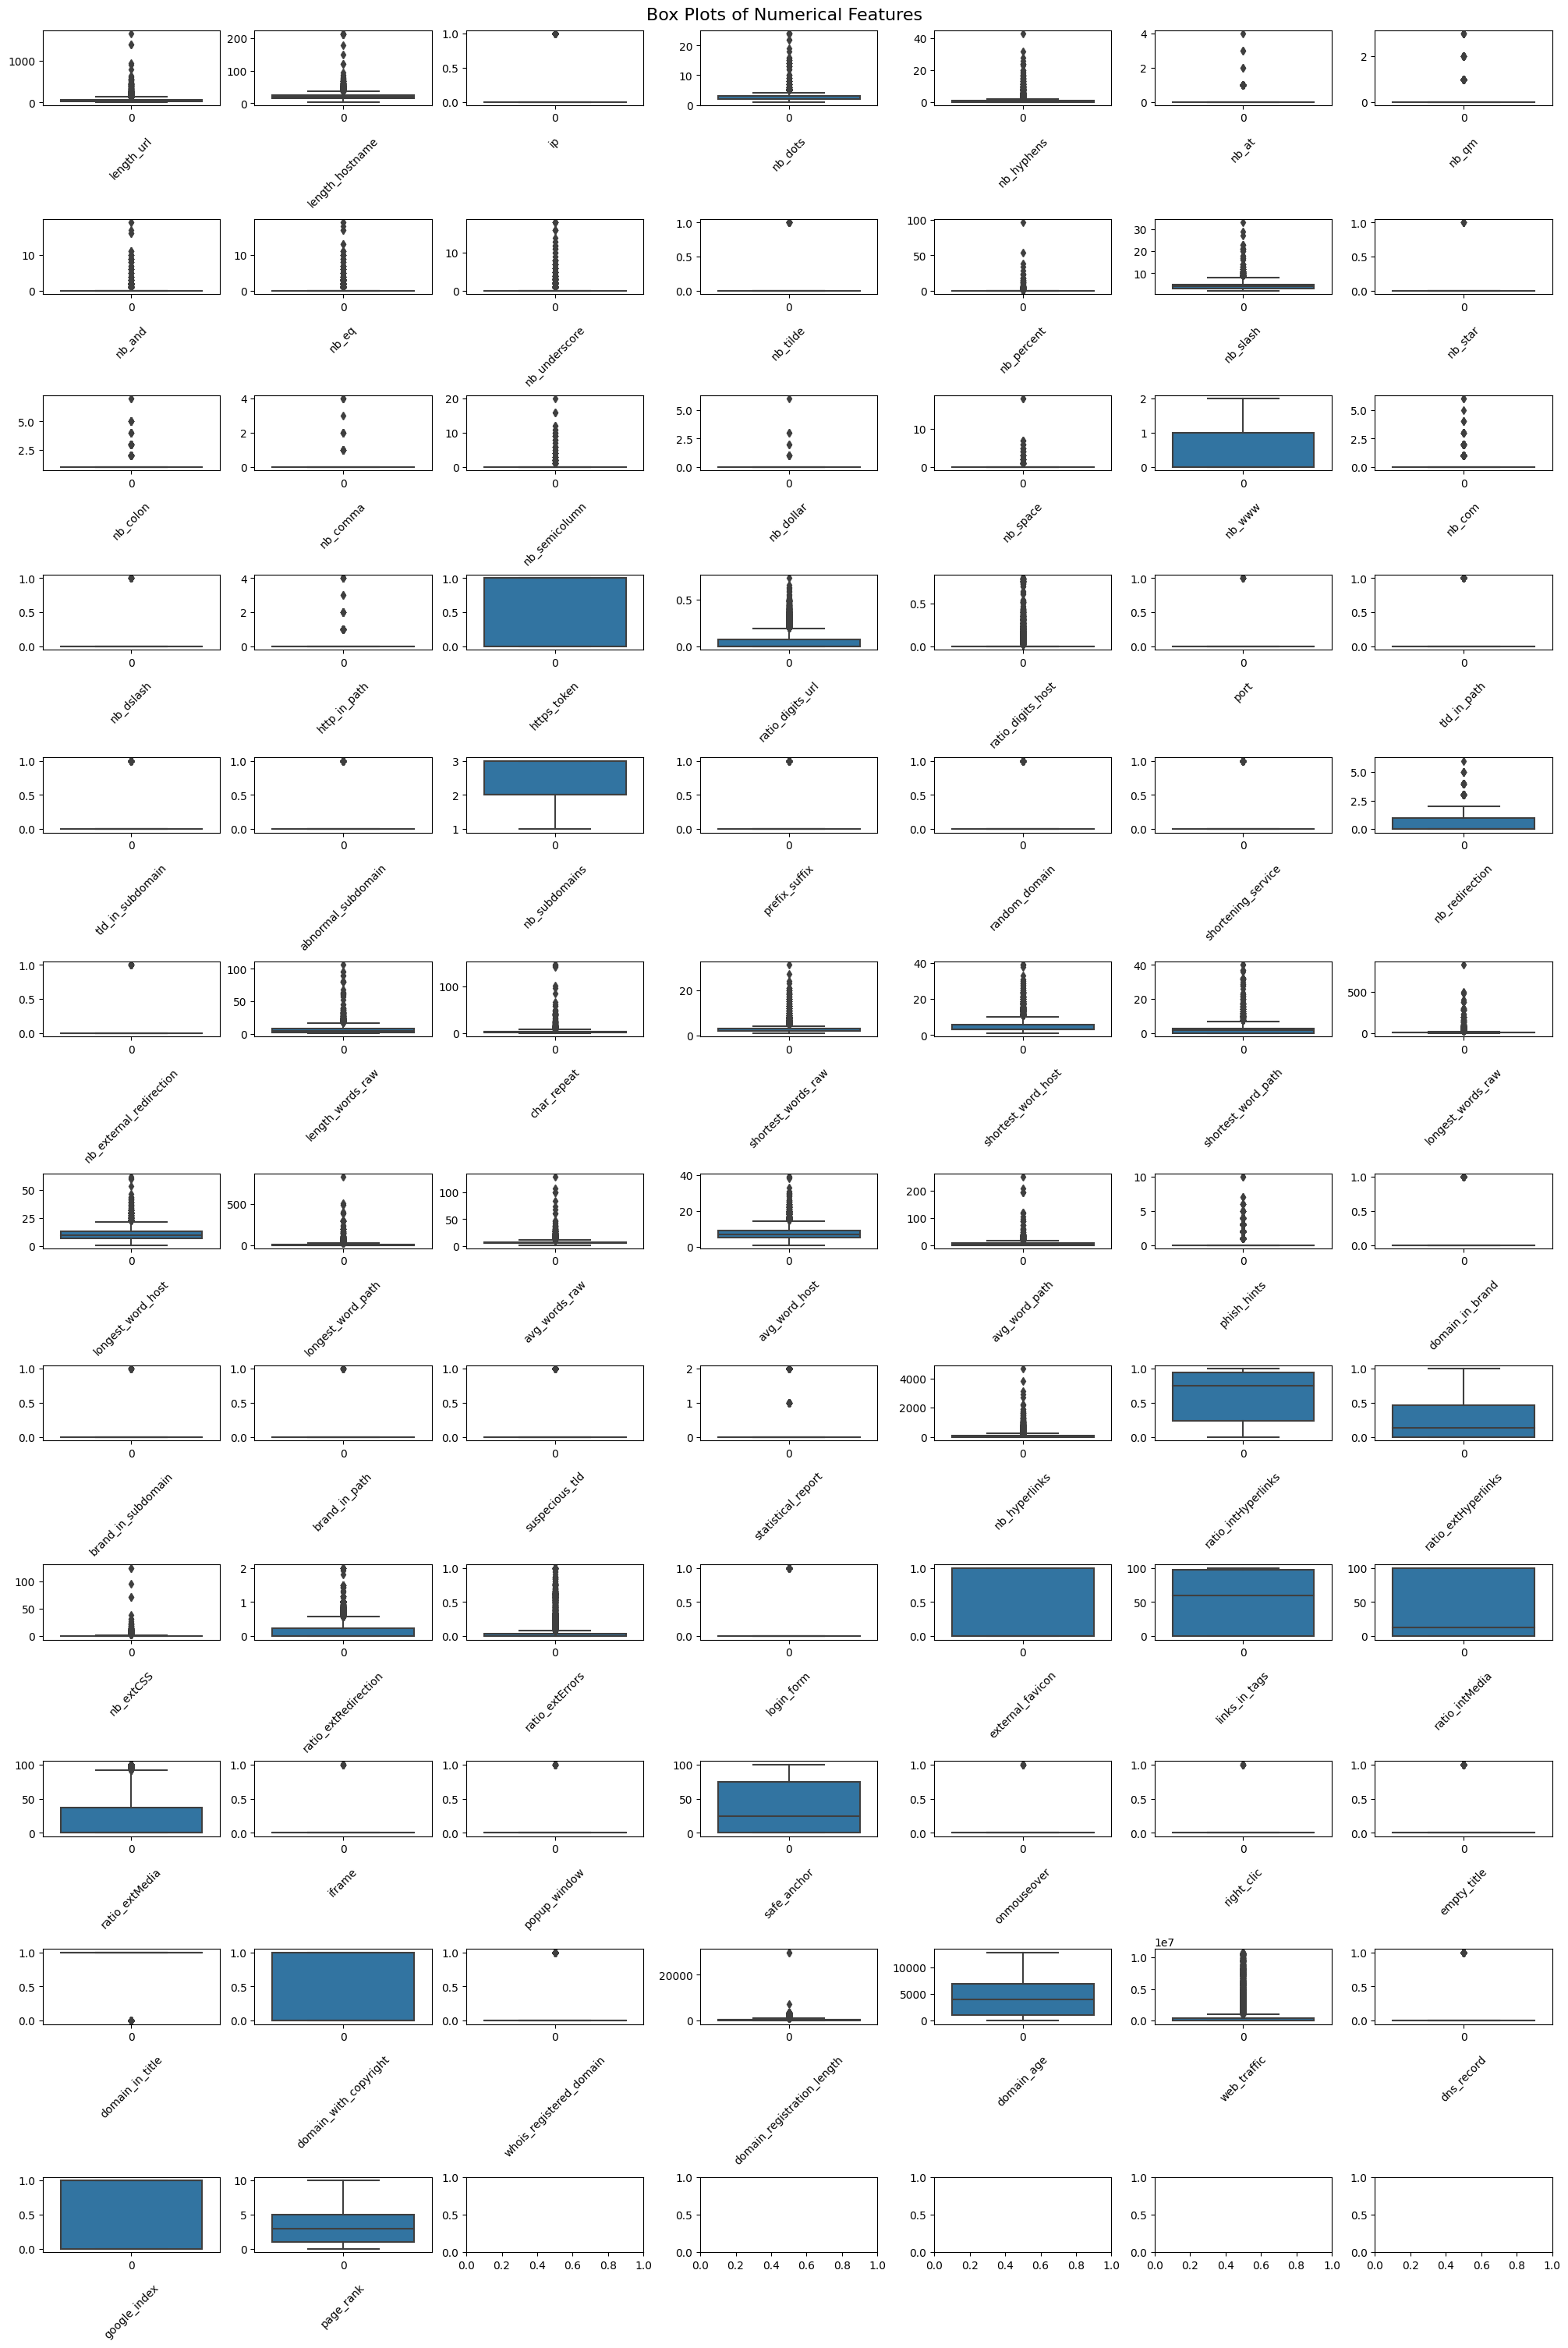

In [ ]:
# Select numerical columns
numerical_cols = df.select_dtypes(include='number').columns.to_list()

# Create subplots for box plots
fig, axes = plt.subplots(12, 7, figsize=(20, 30), constrained_layout=True)
fig.suptitle('Box Plots of Numerical Features', fontsize=16)

# Flatten the axes
axes = axes.flatten()

# Iterate through numerical columns
for ax, col in zip(axes, numerical_cols):
    # Create a box plot for each numerical column
    sns.boxplot(df[col], ax=ax)
    ax.set_xlabel(col, rotation=45, fontsize=10, labelpad=10)

# Show the box plots
plt.show()

# This code creates box plots for numerical features

Create histogram and Kernel Density Estimation (KDE) plots for the numerical features in the dataset

Histograms provide insights into the distribution of each numerical feature, while KDE plots provide a smoothed representation of the data's probability density function. These visualizations helps to understand the data's characteristics, including its central tendencies and variability. They are commonly used for data exploration and analysis.

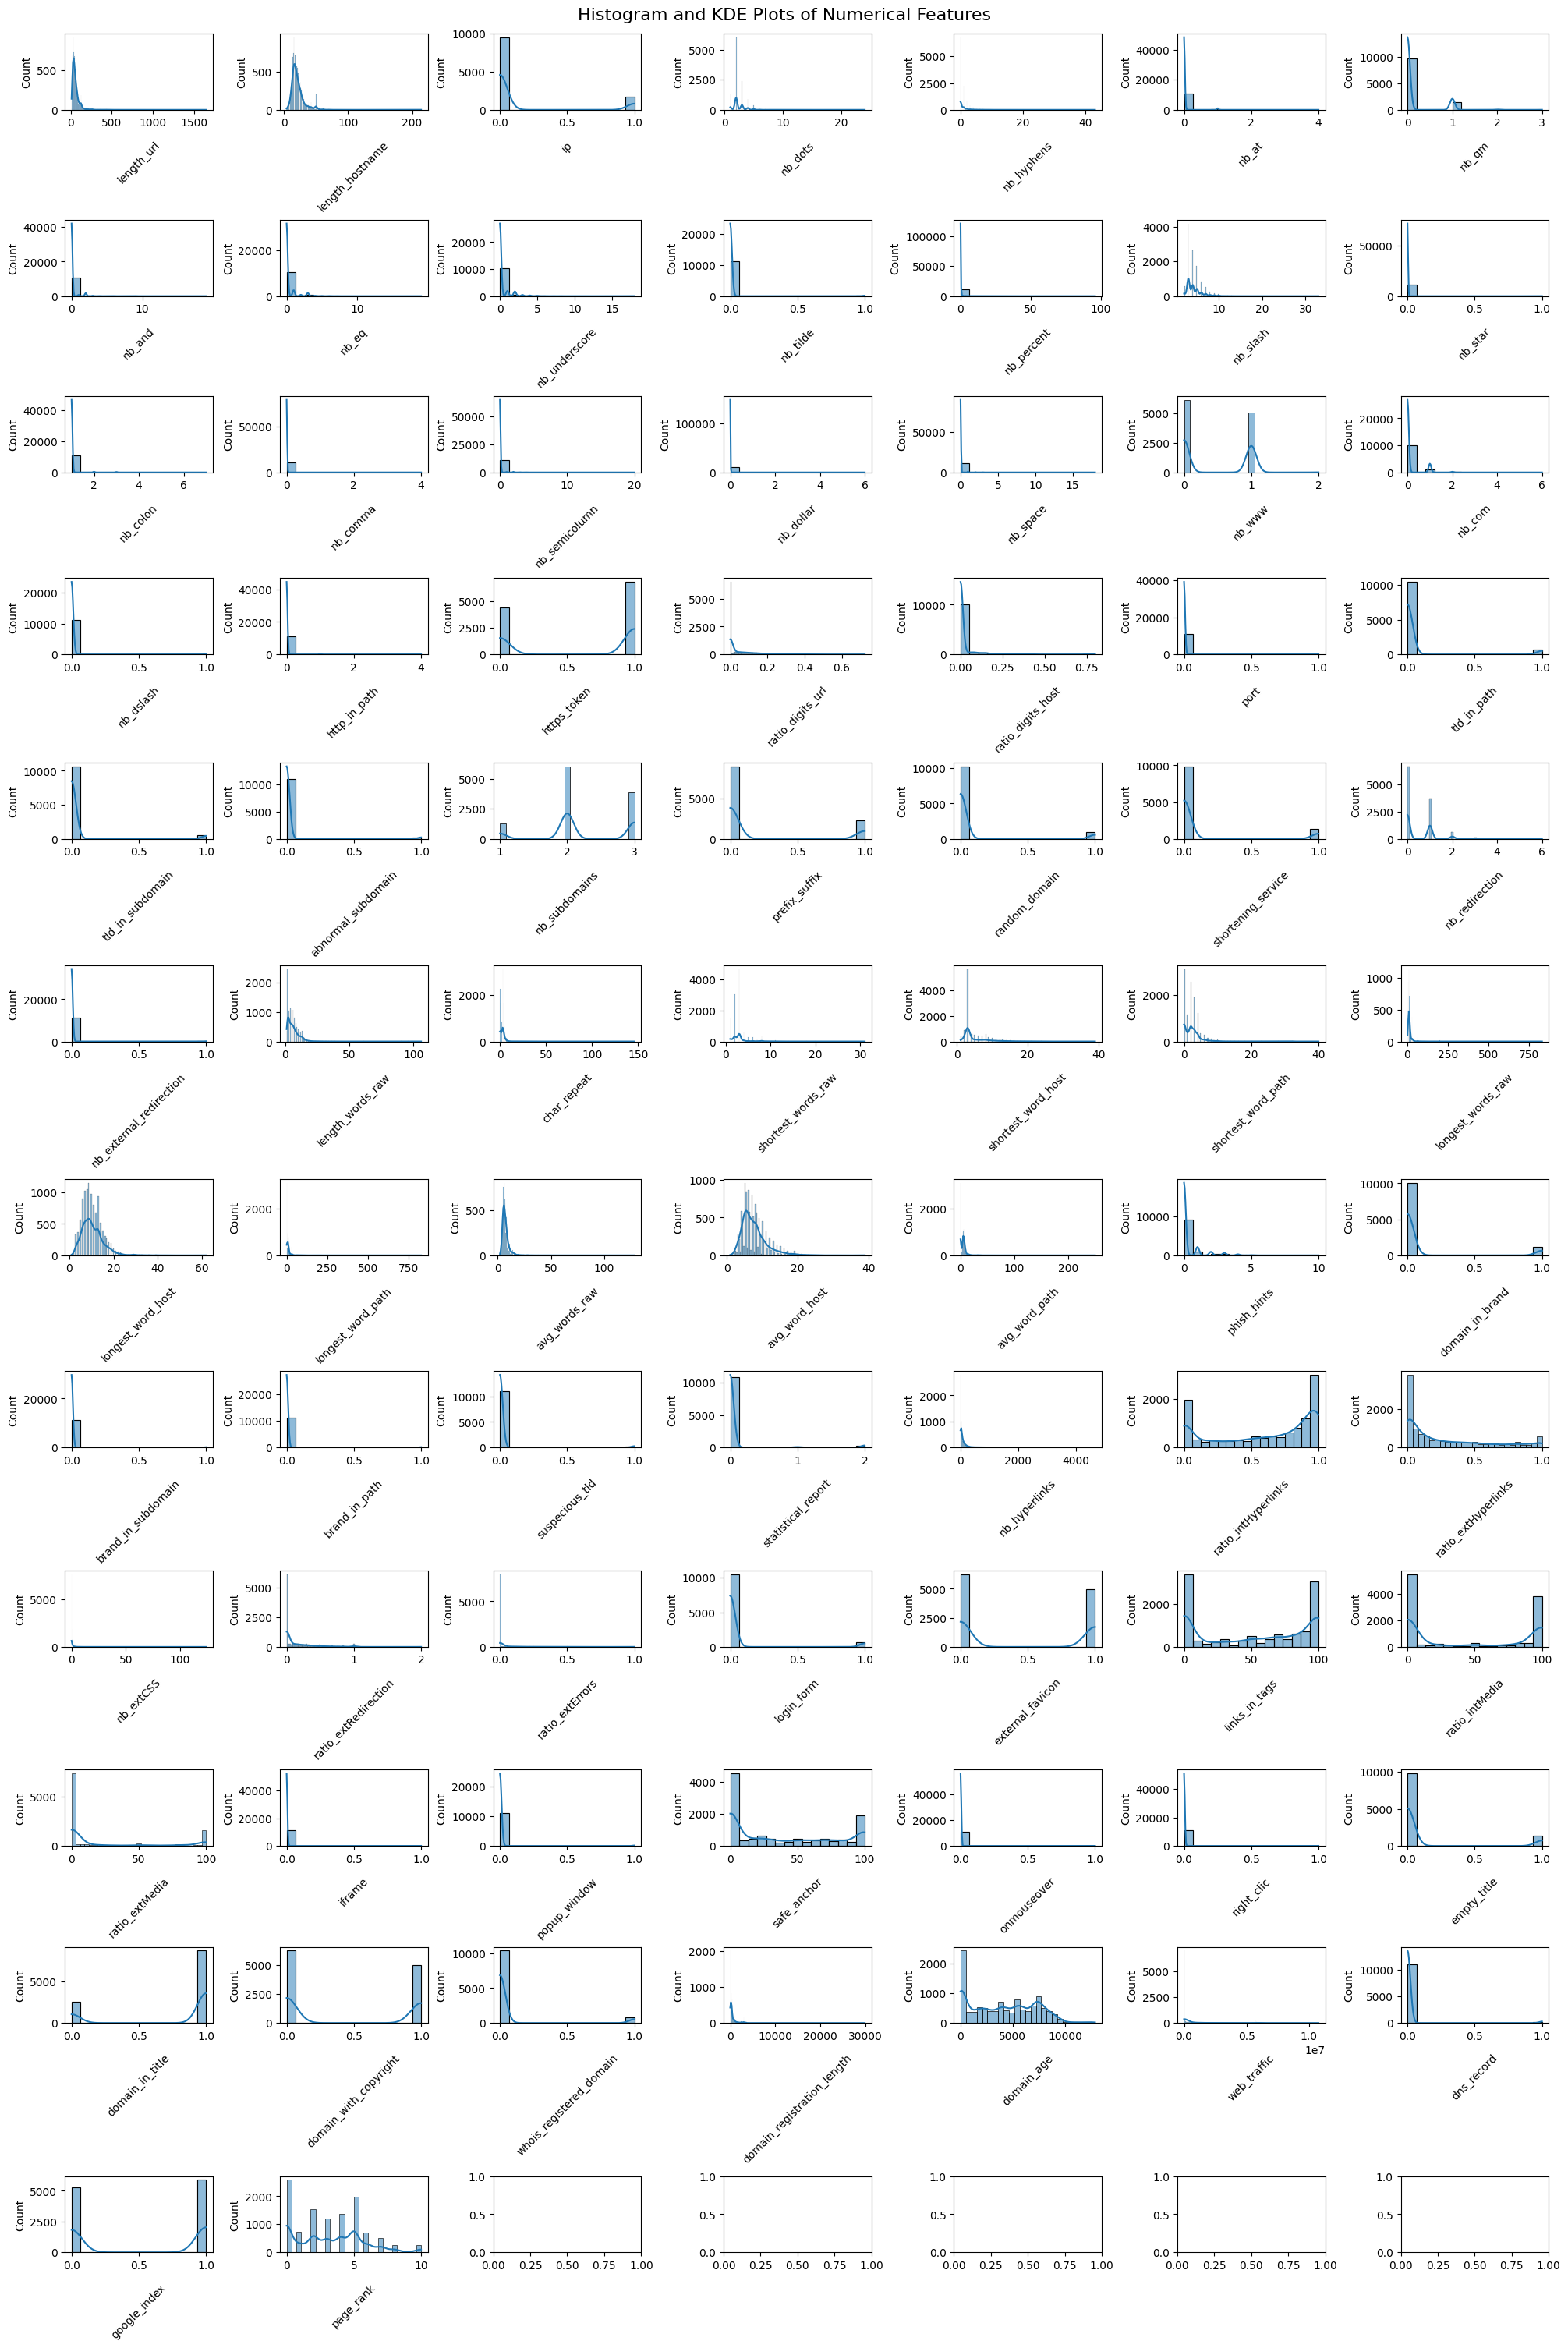

In [ ]:
# Select numerical columns
numerical_cols = df.select_dtypes(include='number').columns.to_list()

# Create subplots for histogram and KDE plots
fig, axes = plt.subplots(12, 7, figsize=(20, 30), constrained_layout=True)
fig.suptitle('Histogram and KDE Plots of Numerical Features', fontsize=16)

# Flatten the axes
axes = axes.flatten()

# Iterate through numerical columns
for ax, col in zip(axes, numerical_cols):
    # Create a histogram and KDE plot for each numerical column
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_xlabel(col, rotation=45, fontsize=10, labelpad=10)

# Show the histogram and KDE plots
plt.show()

# This code creates histogram and KDE plots for numerical features

We have observed potential outliers in many of the columns, but after considering our domain expertise and the data collection process, we have determined that these values are accurate representations of real-world situations and not errors. As a result, we have chosen not to modify or remove these values because they provide valuable and meaningful information in our dataset.

### Visualize correlation coefficients between numerical features

Generate a heatmap of the correlation coefficients between numerical features in the dataset

The resulting heatmap provides a visual representation of the correlations between numerical features in the dataset. It helps to identify relationships between variables, which can be useful for feature selection and understanding the data's internal structure. Correlation coefficients close to 1 indicate strong positive correlations, while coefficients close to -1 indicate strong negative correlations. A coefficient of 0 suggests no linear correlation.

<ipython-input-22-c782b3ccbd92>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


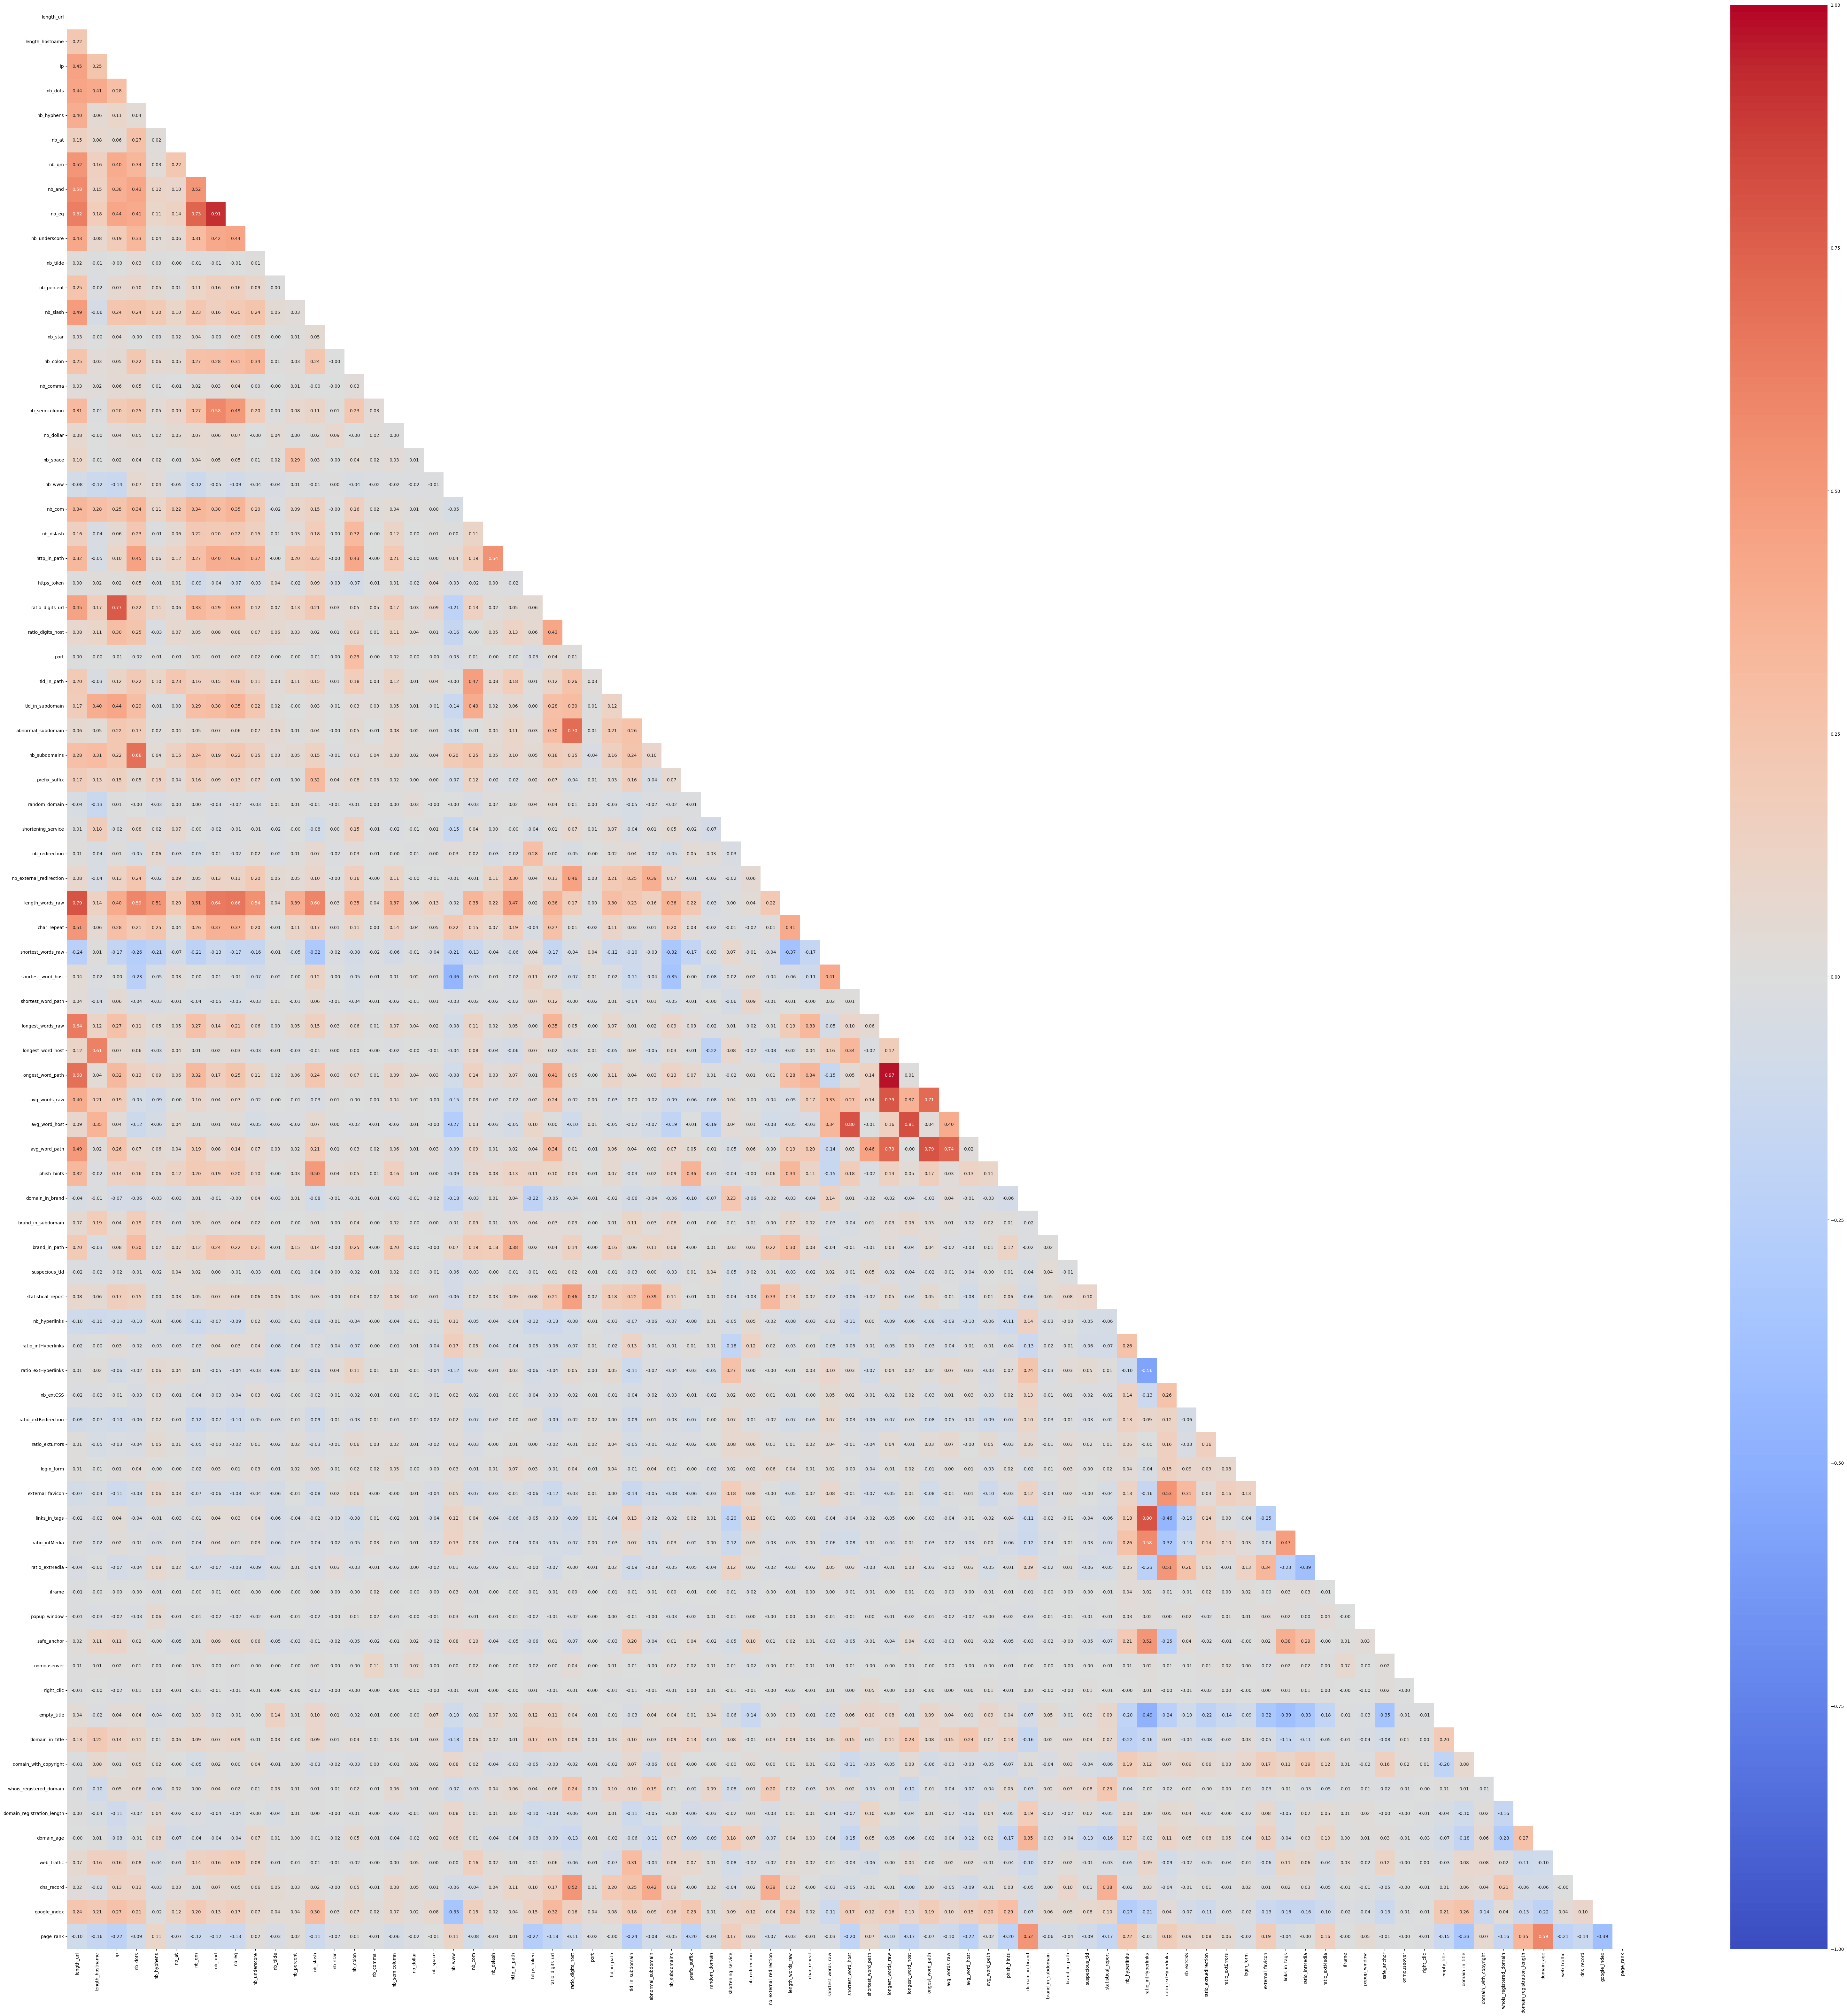

In [ ]:
# Plotting a heatmap of the correlation coefficients of numerical features
plt.figure(figsize=(79, 79))

# Compute the correlation matrix
corr_matrix = df.corr()

# Create a mask to remove diagonal and upper triangle values
mask = np.triu(corr_matrix)

# Create a heatmap with annotations
image = sns.heatmap(corr_matrix, annot=True, fmt='.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)

# image.set_xlabel("X-axis Label")
# image.set_ylabel("Y-axis Label")
# plt.title("Correlation Heatmap")

# Show the heatmap
plt.show()

# This code generates a heatmap of the correlation coefficients between numerical features

Columns longest_words_raw and longest_word_path are observed to have a correlation coefficient of 0.97 which indicates that they almost have the same influence in the predictio. We therefore drop the longest_word_path for model simplicity.

In [ ]:
df.drop(['longest_word_path', 'nb_and'], axis=1, inplace=True)

<ipython-input-23-efb48aa5bd4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['longest_word_path', 'nb_and'], axis=1, inplace=True)


In [ ]:
df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_eq,nb_underscore,nb_tilde,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1.0,0,1,1,4,legitimate
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767.0,0,0,1,2,phishing
2,126,50,1,4,1,0,1,3,2,0,...,1,0,0,14,4004.0,5828815,0,1,0,phishing
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1.0,107721,0,0,3,legitimate
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175.0,8725,0,0,6,legitimate


### **Label Encoding**

Perform the label encoding on the 'status' column in the DataFrame

In [ ]:
#label encoding status column
print(df['status'].value_counts())
df['status']=df['status'].replace(['legitimate','phishing'],[0,1])
print(df['status'].value_counts())
df

legitimate    5692
phishing      5509
Name: status, dtype: int64
0    5692
1    5509
Name: status, dtype: int64


<ipython-input-25-7192e2069348>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status']=df['status'].replace(['legitimate','phishing'],[0,1])


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_eq,nb_underscore,nb_tilde,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1.0,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767.0,0,0,1,2,1
2,126,50,1,4,1,0,1,3,2,0,...,1,0,0,14,4004.0,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1.0,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175.0,8725,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,...,0,0,0,448,5396.0,3980,0,0,6,0
11426,84,18,0,5,0,1,1,1,0,0,...,1,0,0,211,6728.0,0,0,1,0,1
11427,105,16,1,2,6,0,1,1,1,0,...,0,0,0,2809,8515.0,8,0,1,10,0
11428,38,30,0,2,0,0,0,0,0,0,...,1,0,0,85,2836.0,2455493,0,0,4,0


The 'status' column in our DataFrame is now transformed into a binary numeric format, which is commonly used for classification tasks. This encoding makes it easier to work with machine learning algorithms that require numerical input features and target labels. A value of 0 represents the negative class 'legitimate', and a value of 1 represents the positive class 'phishing'.

### **Feature Engineering**

In this section, our primary objective is to decrease the number of features within our original dataset, which offers several advantages, such as:

*  **Enhanced Learning Efficiency**: With a reduced feature set, our models can learn more quickly and efficiently.
*  **Enhanced Model Effectiveness**: Our models will focus on features that have a substantial impact on the output variables, improving their overall effectiveness.

For dimensionality reduction in the dataset, we employ two key techniques, namely PCA (Principal Component Analysis) and SVD (Singular Value Decomposition). In this context, we have implemented PCA to achieve dimensionality reduction.

This alternative phrasing emphasizes the advantages of reducing feature dimensions, highlights the techniques used for this purpose, and emphasizes the selection of PCA as the method of choice for dimensionality reduction.

## **Feature Encoding**

### **Use of PCA and Identify significant and independent features**

Applying Principal Component Analysis (PCA):

**To perform PCA, the following steps are taken**:

*  Initially, PCA is applied without specifying the number of components (n_components). This allows us to assess the explained variance for all available variables.
*  Subsequently, graphical plots are generated to identify significant features.
*  Then, PCA is applied again, this time specifying n_components=0.99. This ensures that we reduce the dimensions while capturing at least 99% of the variance.
*  The optimal number of components is determined during this phase.

**Visualizing Significant Features and Finalizing PCA:**

*  Graphical representations are created to help identify significant features and to make the PCA finalization decision.
*  We generate a Cumulative Variance plot, displaying the cumulative variance of all components.
*  A Cumulative Variance plot with a threshold is constructed to pinpoint the exact number of components.
*  Additionally, a Screeplot is utilized to identify the "elbow point," which aids in the selection of the optimal number of components.

This alternative wording emphasizes the steps involved in applying PCA, feature selection, and the graphical tools used to determine the number of components needed for dimensionality reduction.

Now we are preparing our data for machine learning by shuffling the dataset and separating the features and the target variable, making it ready for model training and evaluation.

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)
X = df.drop('status', axis=1)
y = df['status']
print('Number of features before selection: ', len(X.columns.to_list()))

Number of features before selection:  77


This shuffled dataset ensures that the order of the data doesn't introduce any bias to the analysis. This helps to randomize data and ensures that the model is not influenced by any inherent order or structure.

 Then we drop the status column which is our target variable and prepared the rest of the feature data for the machine learning model and then printed the number of features before selection.

### **Feature Selection**
We use Recursive Feature Elimination (RFE) with cross validation to automatically identify the best predictive features.
This RFE technique helps to find which features have the most significant impact on the target variable.

In [ ]:
# Create a classifier for RFE
clf = RandomForestClassifier()  # You can choose an appropriate classifier

# Create a StratifiedKFold cross-validation splitter
cv = StratifiedKFold(n_splits=5)  # You can adjust the number of folds

# Create an RFE instance with cross-validation
rfe = RFECV(estimator=clf, step=1, cv=cv, scoring='accuracy')  # You can adjust the scoring metric

# Fit RFE to your data
rfe.fit(X, y)

# Get the optimal number of features
optimal_num_features = rfe.n_features_

# Get the ranking of features (1 = most important, n = least important)
feature_ranking = rfe.ranking_

# Get the mask of selected features (True = selected, False = removed)
selected_features_mask = rfe.support_

# Print the results
print("Optimal number of features:", optimal_num_features)
print("Feature ranking:", feature_ranking)
print("Selected features mask:", selected_features_mask)

Optimal number of features: 72
Feature ranking: [1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 1 1 1 1 1 1 1
 1 1 1]
Selected features mask: [ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False  True  True  True  True  True
  True  True  True  True  True]


These results show that the RFE-CV process identified a set of 72 features that are most relevant for our machine learning model, based on cross-validated accuracy with the Random Forest classifier. These features are marked as "True" in the selected features mask, and they can be used for further analysis and model building.

In [ ]:
# Assuming 'selected_features_mask' is the mask obtained from the RFECV results

# Get the indices of the selected features
selected_feature_indices = [i for i, selected in enumerate(selected_features_mask) if selected]

# Use the indices to filter the relevant feature columns in your original DataFrame
optimal_feature_columns = X.columns[selected_feature_indices]

# Print the names of the selected optimal features
print("Selected optimal features:")
for feature in optimal_feature_columns:
    print(feature)

Selected optimal features:
length_url
length_hostname
ip
nb_dots
nb_hyphens
nb_at
nb_qm
nb_eq
nb_underscore
nb_tilde
nb_percent
nb_slash
nb_colon
nb_comma
nb_semicolumn
nb_space
nb_www
nb_com
nb_dslash
http_in_path
https_token
ratio_digits_url
ratio_digits_host
port
tld_in_path
tld_in_subdomain
abnormal_subdomain
nb_subdomains
prefix_suffix
random_domain
shortening_service
nb_redirection
length_words_raw
char_repeat
shortest_words_raw
shortest_word_host
shortest_word_path
longest_words_raw
longest_word_host
avg_words_raw
avg_word_host
avg_word_path
phish_hints
domain_in_brand
brand_in_subdomain
brand_in_path
suspecious_tld
statistical_report
nb_hyperlinks
ratio_intHyperlinks
ratio_extHyperlinks
nb_extCSS
ratio_extRedirection
ratio_extErrors
login_form
external_favicon
links_in_tags
ratio_intMedia
ratio_extMedia
iframe
popup_window
safe_anchor
empty_title
domain_in_title
domain_with_copyright
whois_registered_domain
domain_registration_length
domain_age
web_traffic
dns_record
google_ind

In [ ]:
# Create a new DataFrame containing only the optimal features
X_optimal = X[optimal_feature_columns]

new_df=X_optimal

# Print the new DataFrame
print("X_optimal:")
new_df.head()

X_optimal:


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_eq,nb_underscore,nb_tilde,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
2796,243,37,1,2,15,0,1,1,1,0,...,0,1,0,0,149,216.0,0,0,1,0
5020,155,14,1,4,7,1,0,1,0,0,...,0,1,1,0,0,-1.0,0,0,1,0
10785,28,19,0,2,2,0,0,0,0,0,...,0,1,1,0,89,1737.0,291674,0,0,1
7747,50,22,0,2,1,0,0,0,0,0,...,1,1,0,0,132,4250.0,0,0,1,1
2140,128,54,1,5,1,0,1,3,2,0,...,0,1,0,0,14,4003.0,5816617,0,1,0


### **Scale and/or standardized the features**

*  We're now focused on standardizing the numerical values within our dataset.
*  Given that our values are non-negative, we opt for the MinMax Scaler approach.

 In this section, we are identifing the numerical columns within the DataFrame, scales them using the Min-Max scaling method, and returns the scaled DataFrame

In [ ]:
def scale_numerical_columns(df):
    numerical_columns = df.select_dtypes(include=['number']).columns

    scaler = MinMaxScaler()

    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

    return df

scaled_df = scale_numerical_columns(new_df)
scaled_df

<ipython-input-30-11c8a0fb9714>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_eq,nb_underscore,nb_tilde,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
2796,0.141805,0.157143,1.0,0.043478,0.348837,0.00,0.333333,0.052632,0.055556,0.0,...,0.0,1.0,0.0,0.0,0.005028,0.016854,0.000000e+00,0.0,1.0,0.0
5020,0.087784,0.047619,1.0,0.130435,0.162791,0.25,0.000000,0.052632,0.000000,0.0,...,0.0,1.0,1.0,0.0,0.000034,0.000000,0.000000e+00,0.0,1.0,0.0
10785,0.009822,0.071429,0.0,0.043478,0.046512,0.00,0.000000,0.000000,0.000000,0.0,...,0.0,1.0,1.0,0.0,0.003017,0.134990,2.708715e-02,0.0,0.0,0.1
7747,0.023327,0.085714,0.0,0.043478,0.023256,0.00,0.000000,0.000000,0.000000,0.0,...,1.0,1.0,0.0,0.0,0.004459,0.330175,0.000000e+00,0.0,1.0,0.1
2140,0.071209,0.238095,1.0,0.173913,0.023256,0.00,0.333333,0.157895,0.111111,0.0,...,0.0,1.0,0.0,0.0,0.000503,0.310990,5.401769e-01,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3434,0.069368,0.219048,1.0,0.130435,0.023256,0.00,0.333333,0.157895,0.111111,0.0,...,0.0,1.0,1.0,0.0,0.000872,0.310136,5.300129e-01,0.0,1.0,0.0
2817,0.015347,0.114286,0.0,0.043478,0.023256,0.00,0.000000,0.000000,0.000000,0.0,...,0.0,1.0,1.0,0.0,0.000034,0.000000,0.000000e+00,0.0,0.0,0.2
4695,0.011664,0.042857,0.0,0.086957,0.000000,0.00,0.000000,0.000000,0.000000,0.0,...,1.0,1.0,0.0,1.0,0.000034,0.000000,0.000000e+00,0.0,1.0,0.1
9524,0.053407,0.052381,0.0,0.043478,0.000000,0.00,0.000000,0.000000,0.000000,0.0,...,0.0,1.0,1.0,0.0,0.099765,0.648388,9.286788e-08,0.0,1.0,1.0


### Applying Principal Component Analysis (PCA)

In [ ]:
class DimensionReduction:

    def __init__(self):
        pass

    def applyPCA(self, df, n_components=None, column_names=None):
        pca = PCA(n_components=n_components)
        principalComponents = pca.fit_transform(df)
        principal_df = pd.DataFrame(data = principalComponents, columns = column_names)

        return principal_df, pca

    def plotCumVariance(self, pca):

        exp_var_pca = pca.explained_variance_ratio_
        cum_sum_eigenvalues = np.cumsum(exp_var_pca)

        plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
        plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid', label='Cumulative explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal component index')
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()

    def plotThreshold(self, pca):

        exp_var_pca = pca.explained_variance_ratio_
        cum_sum_eigenvalues = np.cumsum(exp_var_pca)

        compo = len(exp_var_pca)

        plt.ylim(0.0,1.1)
        plt.plot(np.arange(1, compo+1, step=1), cum_sum_eigenvalues, marker='o', linestyle='--', color='b')

        plt.xlabel('Number of Components')
        plt.xticks(np.arange(0, compo, step=10))
        plt.ylabel('Cumulative variance (%)')
        plt.title('The number of components needed to explain variance')

        plt.axhline(y=0.99, color='r', linestyle='-')
        plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

        plt.show()

    def screePlot(self, pca):
        plt.style.use("ggplot")
        plt.plot(pca.explained_variance_, marker='o')
        plt.xlabel("Eigenvalue number")
        plt.ylabel("Eigenvalue size")
        plt.title("Scree Plot")

In [ ]:
dm_reduce = DimensionReduction()

In [ ]:
principal_df, pca = dm_reduce.applyPCA(
    df=scaled_df,
    n_components=None
)

principal_df

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,-0.015559,-0.830003,-0.244514,0.795185,-0.090690,0.232823,0.178932,-0.549018,0.292869,0.357399,...,-0.006786,-0.024027,0.002760,0.026079,0.003355,0.010823,-0.014948,-0.006493,-0.001272,-0.006187
1,-0.081522,-0.022765,0.938501,0.770388,0.167935,-0.705659,0.391746,-0.037757,0.739380,0.522421,...,-0.006010,-0.006187,0.004256,-0.038210,-0.005808,-0.002672,0.000362,0.018587,-0.004453,-0.001805
2,0.072296,1.083793,0.341343,0.066672,0.422213,0.397844,-0.428572,-0.482810,0.215507,0.346338,...,0.003031,-0.021612,-0.021502,0.007167,-0.000793,0.000692,0.003219,-0.000774,0.003037,0.000654
3,1.118025,-1.052657,-0.372544,-0.144277,0.224991,-0.027761,-0.593783,0.527325,-0.108952,-0.210823,...,-0.003728,-0.016637,0.003548,0.005251,0.002534,-0.000299,-0.003387,-0.000516,0.006008,0.002733
4,-0.329074,-1.360500,0.534817,0.393938,-0.577594,1.004563,0.037228,0.083029,0.456533,-0.462580,...,-0.002726,-0.006359,0.001534,-0.009508,-0.006684,-0.008990,0.012140,0.003890,-0.001886,0.003449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11196,-0.916539,-1.203804,1.250454,0.389081,-0.003584,0.463536,0.174681,0.354704,0.210154,-0.310071,...,-0.007389,-0.017983,0.004494,-0.003545,-0.009509,-0.005775,-0.005412,-0.002030,-0.004255,0.008368
11197,-1.304064,-0.096570,0.217175,0.406715,0.533637,0.210541,-0.876535,0.113163,0.033978,-0.284238,...,0.001006,-0.008780,-0.001561,0.009222,0.001424,0.000875,-0.008235,-0.000803,-0.005588,-0.003858
11198,0.962407,-0.731777,-0.731768,0.451566,0.607842,-0.261450,-0.087386,-0.211072,0.399828,0.432791,...,-0.000616,-0.000442,-0.002824,-0.005781,0.006525,-0.000078,0.002730,0.004321,0.005723,-0.001441
11199,0.817948,1.060541,0.345097,0.694438,0.291907,0.037752,0.244517,-0.106489,-0.690828,0.045846,...,-0.005902,-0.009955,0.014200,-0.005319,0.003179,0.008486,0.004897,-0.005952,-0.001981,-0.003732


Generate three different plots which helps to understand the variance explained by the principal components obtained through PCA:

*dm_reduce.plotCumVariance(pca):*
Create a plot showing both individual explained variance and cumulative explained variance for each principal component. It helps us visualize how much variance each component contributes and where the cumulative variance reaches certain thresholds.

*dm_reduce.plotThreshold(pca):*
This plot visualizes the cumulative explained variance and marks a threshold at 99%. It helps us see how many principal components are needed to explain 99% of the total variance.

*dm_reduce.screePlot(pca):*
This generates a traditional scree plot, showing the eigenvalues of the principal components. We can use this plot to decide how many components to retain based on the "elbow" point in the plot.

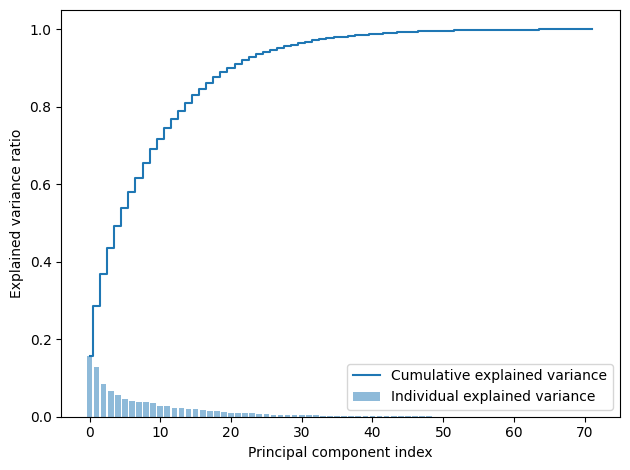

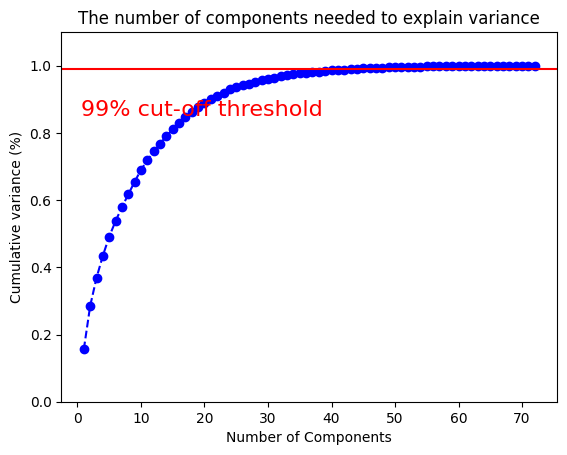

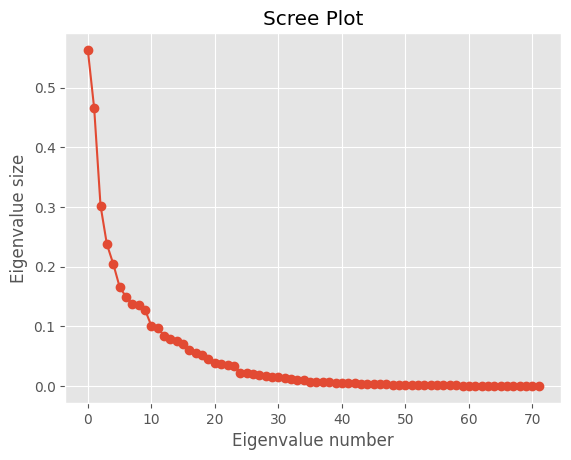

In [ ]:
dm_reduce.plotCumVariance(pca)
dm_reduce.plotThreshold(pca)
dm_reduce.screePlot(pca)

Apply Principal Component Analysis (PCA) to the scaled_df dataset with a specific target explained variance of 0.99 (99%)

In [ ]:
principal_df_2, pca = dm_reduce.applyPCA(
    df=scaled_df,
    n_components=0.99,
    column_names=None
)

principal_df_2

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,-0.015559,-0.830003,-0.244514,0.795185,-0.090690,0.232823,0.178932,-0.549018,0.292869,0.357399,...,0.262013,-0.108061,-0.070983,0.150628,-0.068316,-0.150926,0.079763,0.259010,-0.074530,-0.292841
1,-0.081522,-0.022765,0.938501,0.770388,0.167935,-0.705659,0.391746,-0.037757,0.739380,0.522421,...,-0.026864,0.038134,0.093561,0.090129,-0.040417,0.093148,-0.025938,-0.152261,-0.007280,-0.059099
2,0.072296,1.083793,0.341343,0.066672,0.422213,0.397844,-0.428572,-0.482810,0.215507,0.346338,...,0.018050,0.012962,-0.008540,0.017389,-0.025947,-0.010462,0.002273,-0.008367,0.002601,-0.018169
3,1.118025,-1.052657,-0.372544,-0.144277,0.224991,-0.027761,-0.593783,0.527325,-0.108952,-0.210823,...,-0.028193,0.016443,-0.072382,-0.064657,0.050753,-0.012438,0.054139,0.034413,0.057632,-0.006982
4,-0.329074,-1.360500,0.534817,0.393938,-0.577594,1.004563,0.037228,0.083029,0.456533,-0.462580,...,-0.023370,-0.096722,0.012639,-0.037708,0.020392,0.005182,0.008523,-0.049115,0.049434,-0.035609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11196,-0.916539,-1.203804,1.250454,0.389081,-0.003584,0.463536,0.174681,0.354704,0.210154,-0.310071,...,-0.127205,-0.066605,-0.013070,-0.031629,0.018492,-0.016395,0.018210,0.003257,0.026013,-0.046242
11197,-1.304064,-0.096570,0.217175,0.406715,0.533637,0.210541,-0.876535,0.113163,0.033978,-0.284238,...,-0.027047,-0.025129,-0.007506,-0.058685,0.035831,-0.043866,-0.042629,-0.000779,0.025840,-0.005054
11198,0.962407,-0.731777,-0.731768,0.451566,0.607842,-0.261450,-0.087386,-0.211072,0.399828,0.432791,...,0.018485,-0.001261,-0.061100,-0.003426,0.003871,-0.022539,0.057905,-0.003116,0.032720,-0.015285
11199,0.817948,1.060541,0.345097,0.694438,0.291907,0.037752,0.244517,-0.106489,-0.690828,0.045846,...,-0.116211,0.039861,0.034779,0.068738,-0.064524,0.045626,-0.037455,-0.061502,-0.035659,-0.009482


Apply Principal Component Analysis (PCA) to the scaled_df dataset with a specified number of components (20) and custom column names for the new principal component columns

In [ ]:
principal_df_final, pca = dm_reduce.applyPCA(
    df=scaled_df,
    n_components=20,
    column_names=["PCA_0", "PCA_1", "PCA_2", "PCA_3", "PCA_4", "PCA_5", "PCA_6", "PCA_7", "PCA_8","PCA_9", "PCA_10", "PCA_11", "PCA_12", "PCA_13", "PCA_14", "PCA_15", "PCA_16", "PCA_17", "PCA_18", "PCA_19"]
)

principal_df_final

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19
0,-0.015559,-0.830002,-0.244516,0.795189,-0.090690,0.232835,0.178940,-0.549022,0.292876,0.357453,0.354312,0.486724,-0.211274,0.410064,-0.120890,0.447870,-0.026614,0.195072,0.169863,-0.424656
1,-0.081522,-0.022766,0.938504,0.770382,0.167936,-0.705666,0.391723,-0.037768,0.739393,0.522392,0.410799,0.259726,-0.170404,0.140141,-0.132653,0.103132,0.431173,-0.050939,0.508561,-0.286696
2,0.072296,1.083793,0.341342,0.066672,0.422212,0.397844,-0.428563,-0.482811,0.215508,0.346324,0.451707,0.060834,-0.209751,-0.054576,-0.026747,0.095481,0.228323,0.739582,-0.359807,0.051517
3,1.118025,-1.052657,-0.372544,-0.144277,0.224991,-0.027761,-0.593777,0.527325,-0.108950,-0.210834,-0.339650,-0.159503,-0.054612,-0.027476,-0.125395,-0.017104,0.143701,-0.054408,-0.181896,0.119272
4,-0.329074,-1.360500,0.534817,0.393938,-0.577594,1.004563,0.037226,0.083029,0.456534,-0.462575,-0.164229,-0.118509,-0.056156,0.321072,-0.122590,0.140559,-0.371860,0.201491,0.145549,0.170576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11196,-0.916539,-1.203804,1.250454,0.389081,-0.003584,0.463537,0.174686,0.354708,0.210154,-0.310074,-0.355075,0.130604,-0.198583,-0.067407,-0.009664,-0.014745,-0.298575,-0.061017,-0.004000,0.458287
11197,-1.304064,-0.096570,0.217176,0.406714,0.533637,0.210541,-0.876537,0.113164,0.033980,-0.284239,-0.069076,-0.079423,0.123017,-0.297833,-0.036858,-0.056335,-0.022714,0.003136,0.075286,-0.124603
11198,0.962407,-0.731777,-0.731768,0.451566,0.607842,-0.261451,-0.087385,-0.211073,0.399829,0.432782,0.169013,-0.512990,0.418863,-0.160060,-0.207056,-0.218868,-0.221319,-0.107325,-0.553809,-0.377121
11199,0.817948,1.060541,0.345097,0.694437,0.291907,0.037753,0.244525,-0.106484,-0.690829,0.045836,0.117807,0.136509,-0.326590,0.596507,0.022446,-0.532498,0.120067,-0.223122,-0.258342,-0.094148


In [ ]:
X = principal_df_final
y = df["status"]
print('Number of features after pca: ', len(X.columns.to_list()))

Number of features after pca:  20


After applying Principal Component Analysis (PCA) to the dataset, we have reduced the number of features to 20 principal components. This dimensionality reduction can help simplify the dataset while retaining the most relevant information for our analysis or modeling. We can now use these 20 principal components (features) for further analysis or machine learning tasks.

### Splitting Prediction and Target Variables
We split the dataset into prediction features and a target

* Training set - to train the model
* The testing set - to evaluate the model's performance.
* The split ratio is determined by the test-size parameter which we have used 0.2.  
* It splits the dataset into 20%  of test set and 80% of training set.
* This is a good balance between those two subsets because the model has enough examples to learn from while having a good amount of unseen data for testing.


In [ ]:
# Splitting the data into training and testing sets, and printing their shapes to verify the dimensions.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8960, 20) (8960,)
(2241, 20) (2241,)


In [ ]:
# Resetting the indices of the training and testing sets to ensure consistent indexing.
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# **Model Building and Evaluation**



In the process of building and testing our models, we go on a thorough process to create and check how well they predict outcomes for the specific problem we're working on. This involves a series of important steps and methods to make sure our final model is both accurate and strong.

Install xgboost

In [ ]:
!pip install xgboost
import xgboost as xgb

### Model Building

We have used six machine learning models with default hyperparameters for each model.

* **Random Forest** combines multiple decision trees. It’s robust to overfitting and can handle a large number of features. So, it is a good choice for our dataset with 20 features. It also provides feature importance which can be useful for interpretability.

* **Decision Trees** can handle both categorical and numerical data. So it is suitable for our dataset which seems to have both types of features. However, the issue with this algorithm is that if they are not properly tuned, they can easily overfit the data.

* **Support Vector Machine** can handle high-dimensional data, non-linear relationships, balanced datasets, and robustness to overfitting. They also maximize the margin between classes, making them effective for clear separation in pishing detection.

* **K-Nearest Neighbors** is a method that can be used for both classification and regression. So its suitable for binary classification in this dataset. It’s simple and effective, especially in cases where the decision boundaries are irregular. However it is sensitive to irrelevant features and the scale of the data. So, Feature selection and data normalization should be done before applying this algorithm.

* **Logistic Regression** is a good baseline model for binary classification problems. It's easy to implement and understand. However, it assumes a linear decision boundary and may underperform if this assumption is violated.

* **XGBoost** is a gradient boosting algorithm known for its speed and performance. It can handle a large number of features and is less prone to overfitting. It's a good choice for a model with high predictive power.



For this model we are using repeated stratified K-fold cross validation to asses models performance by repeatedly splitting the training dataset into 10 K folds so that it ensures that class distribution is approximately equal in each fold.

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machines": SVC(kernel='linear', probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": xgb.XGBClassifier()
}

# Define the cross-validation strategy
rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)

results = {}

for model_name, model in models.items():
    # Use cross-validation to evaluate the model
    accuracy_scores = cross_val_score(model, X_train, y_train, cv=rkf, scoring='accuracy')
    precision_scores = cross_val_score(model, X_train, y_train, cv=rkf, scoring='precision')
    recall_scores = cross_val_score(model, X_train, y_train, cv=rkf, scoring='recall')
    f1_scores = cross_val_score(model, X_train, y_train, cv=rkf, scoring='f1')

    # Calculate ROC-AUC scores
    roc_auc_scores = cross_val_score(model, X_train, y_train, cv=rkf, scoring='roc_auc')

    results[model_name] = {
        "Accuracy": accuracy_scores.mean(),
        "Precision": precision_scores.mean(),
        "Recall": recall_scores.mean(),
        "F1-score": f1_scores.mean(),
        "ROC-AUC": roc_auc_scores.mean()
    }

# Display the results
results_df = pd.DataFrame.from_dict(results, orient="columns")
results_df = results_df.T
print(results_df)

                         Accuracy  Precision    Recall  F1-score   ROC-AUC
Random Forest            0.932292   0.936002  0.925795  0.930784  0.979486
K-Nearest Neighbors      0.912649   0.916429  0.905073  0.910621  0.958072
Support Vector Machines  0.910900   0.913410  0.904848  0.909010  0.964738
Decision Tree            0.894531   0.889721  0.897053  0.893256  0.894570
Logistic Regression      0.912091   0.911368  0.910066  0.910603  0.965282
XGBoost                  0.934896   0.937061  0.930332  0.933591  0.981565


For the model evaluation, we have used 4 performance metrices.
* **Accuracy** which is a common metric to assess overall model performance
* **Precision** which measures the model's ability to make correct positive predictions
* **Recall**  which measures the model's ability to find all positive instances
* **F1 score** which Combines precision and recall into a single metric balancing false positives and false negatives
* **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)** measures a model's ability to differentiate between the two classes


### ROC curve

The Receiver Operating Characteristic (ROC) curve is a graphical representation used to assess the performance of classification models. It illustrates the trade-off between a model's true positive rate and its false positive rate across various decision thresholds.

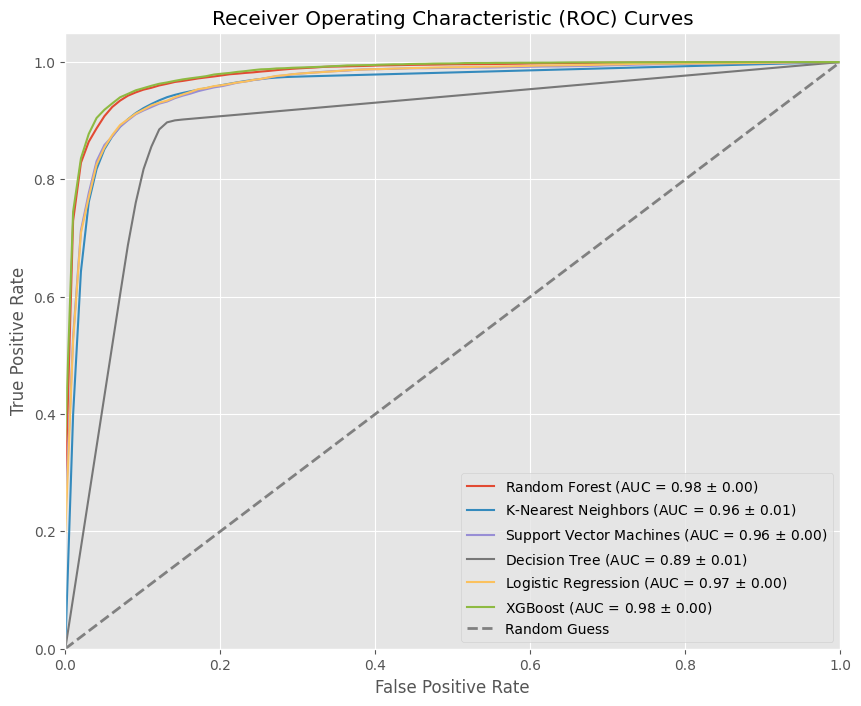

In [ ]:
# Convert X_train and y_train to NumPy arrays
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

plt.figure(figsize=(10, 8))

for name, model in models.items():
    tpr_list = []
    auc_list = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_index, test_index in rkf.split(X_train, y_train):
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

        model.fit(X_train_cv, y_train_cv)
        y_prob = model.predict_proba(X_test_cv)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_cv, y_prob)
        tpr_list.append(np.interp(mean_fpr, fpr, tpr))
        auc_list.append(auc(fpr, tpr))

    mean_tpr = np.mean(tpr_list, axis=0)
    mean_auc = np.mean(auc_list)
    std_auc = np.std(auc_list)

    plt.plot(mean_fpr, mean_tpr, label=f'{name} (AUC = {mean_auc:.2f} $\pm$ {std_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2, label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

### Confusion Matrix

A confusion matrix is a visual representation of a classification model's performance. In the matrix, four key values are presented: true positives, true negatives, false positives, and false negatives. It helps evaluate model's accuracy and precision by showing how well it classifies instances.

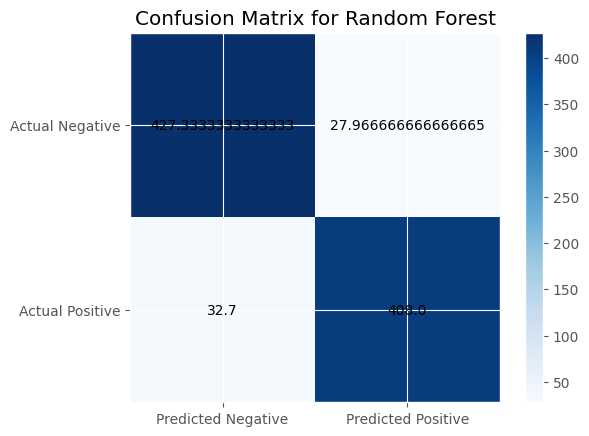

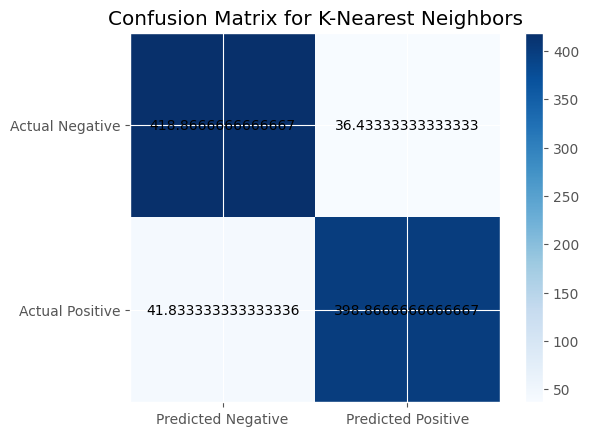

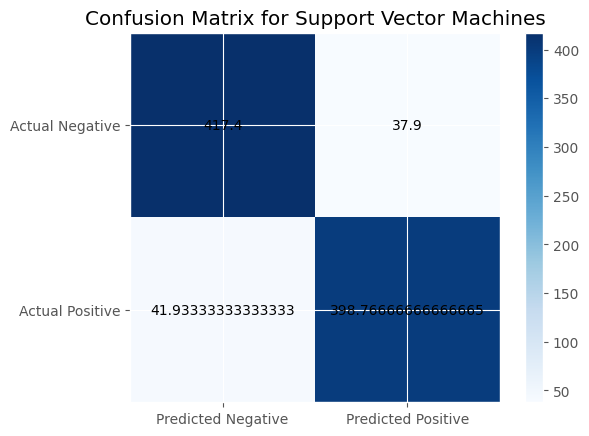

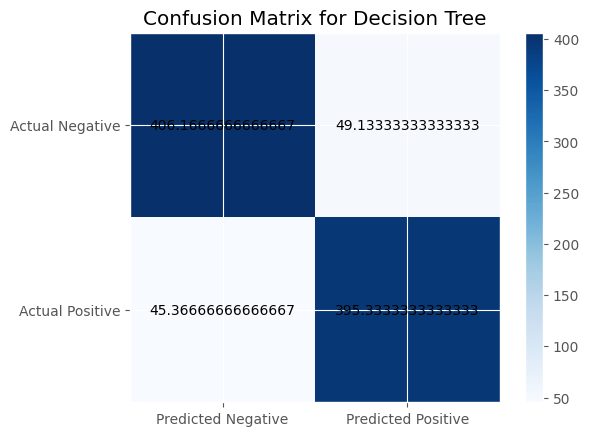

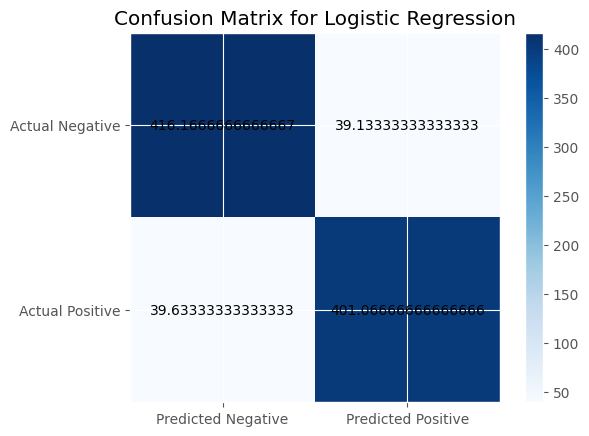

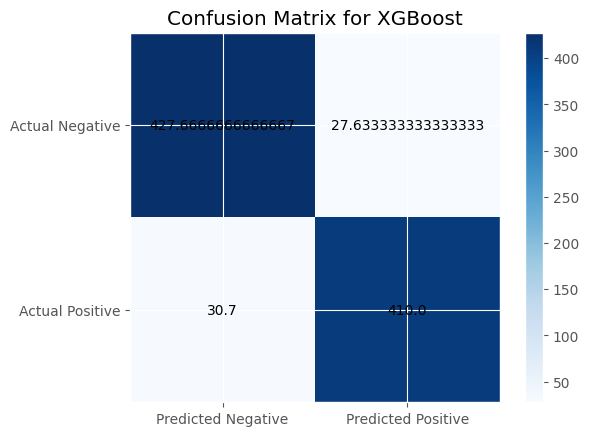

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machines": SVC(kernel='linear', probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": xgb.XGBClassifier()
}

for name, model in models.items():
    conf_matrix_list = []

    for train_index, test_index in rkf.split(X_train, y_train):
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_test_cv)
        conf_matrix = confusion_matrix(y_test_cv, y_pred)
        conf_matrix_list.append(conf_matrix)

    mean_conf_matrix = np.mean(conf_matrix_list, axis=0)

    # Plot the confusion matrix
    plt.imshow(mean_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.colorbar()

    plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
    plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])

    for i in range(2):
        for j in range(2):
            plt.text(j, i, mean_conf_matrix[i, j], ha='center', va='center', color='black')

    plt.show()

From training the above models, we can conclue Random Forest, XGBoost provides the best accuracy out of the others with the current default parameters achieving an impressive AUC of 0.98. Therfore, hyper-parameter tuning will be conducted on those models.

### **Hyper Parameter Tuning**

Hyperparameter tuning is a critical process that involves optimizing the settings of a machine learning model to enhance its performance. In this context, we are conducting hyperparameter tuning for all four models. The objective is to identify which of these models consistently delivers the highest accuracy after hyperparameter tuning, offering valuable insights for model selection and optimization.

**Hyper Parameter Tuning (Random Forest)**

In [ ]:
# Define a list of hyperparameter configurations to try
hyperparameter_configs = [
    {"n_estimators": 100, "max_depth": 10, "min_samples_split": 2},
    {"n_estimators": 200, "max_depth": 20, "min_samples_split": 5},
    {"n_estimators": 300, "max_depth": 30, "min_samples_split": 10},
]

best_accuracy = 0
best_params = {}

# Loop through hyperparameter configurations and evaluate the model
for config in hyperparameter_configs:
    rf_classifier = RandomForestClassifier(random_state=42, **config)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = config

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Best Hyperparameters: {'n_estimators': 300, 'max_depth': 30, 'min_samples_split': 10}
Best Accuracy: 0.9393128067826862


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


**Hyper Parameter Tuning (XGBoost)**

In [ ]:
# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 4, 5],  # Maximum depth of the tree
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300}
Best Accuracy: 0.9349330357142858


Therefore, we can conclude, even after hyper parameter tuning  Random Forest Model and XGBoost gives the highest accuracy.